#<font color="BEE7FF">**Preparation**</font>


Import library

In [ ]:
#Import package yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import preprocessing
import statsmodels.api as sm
import scipy.stats as ss
import scipy.stats as stats

Mengimport data yang akan digunakan

In [ ]:
#Membaca dan memanggil data
df_diamond = pd.read_csv('https://raw.githubusercontent.com/amandaabidah/csv_database/main/diamonds.csv')
df_diamond

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#Menghapus kolom Unnamed karena hanya berisi indeks atau baris observasi
df_diamond = df_diamond.drop(columns=['Unnamed: 0'])
df_diamond.shape

(53940, 10)

In [ ]:
#Melihat tipe tipe data dari variabel atau atribut pada dataset
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#<font color="BEE7FF">**Pre-Processing Data Diamond**</font>
Pada proses ini kami memilih atribut yang akan menjadi variabel dependen dan independen. Setelah memilih atribut yang akan digunakan, kami melakukan pre-processing untuk membersihkan data. Tujuannya agar dapat memperoleh hasil regresi yang baik dan representatif terhadap data yang kami miliki.




**COLUMNS SELECTION**

Akan dipilih beberapa kolom yang akan diproses

<ipython-input-5-6ffef7ea3cb3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_diamond.corr(), annot = True, cmap="YlGnBu")


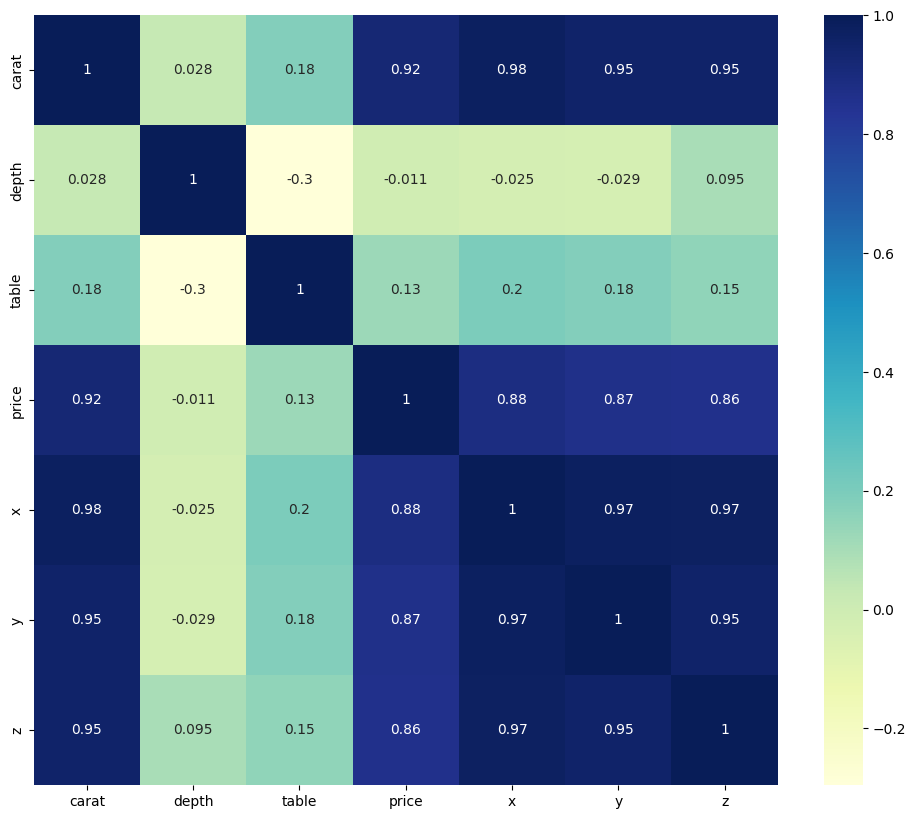

In [ ]:
#Melihat korelasi sebelum dilakukan preprocessing
plt.figure(figsize = (12, 10))
sns.heatmap(df_diamond.corr(), annot = True, cmap="YlGnBu")
plt.show()

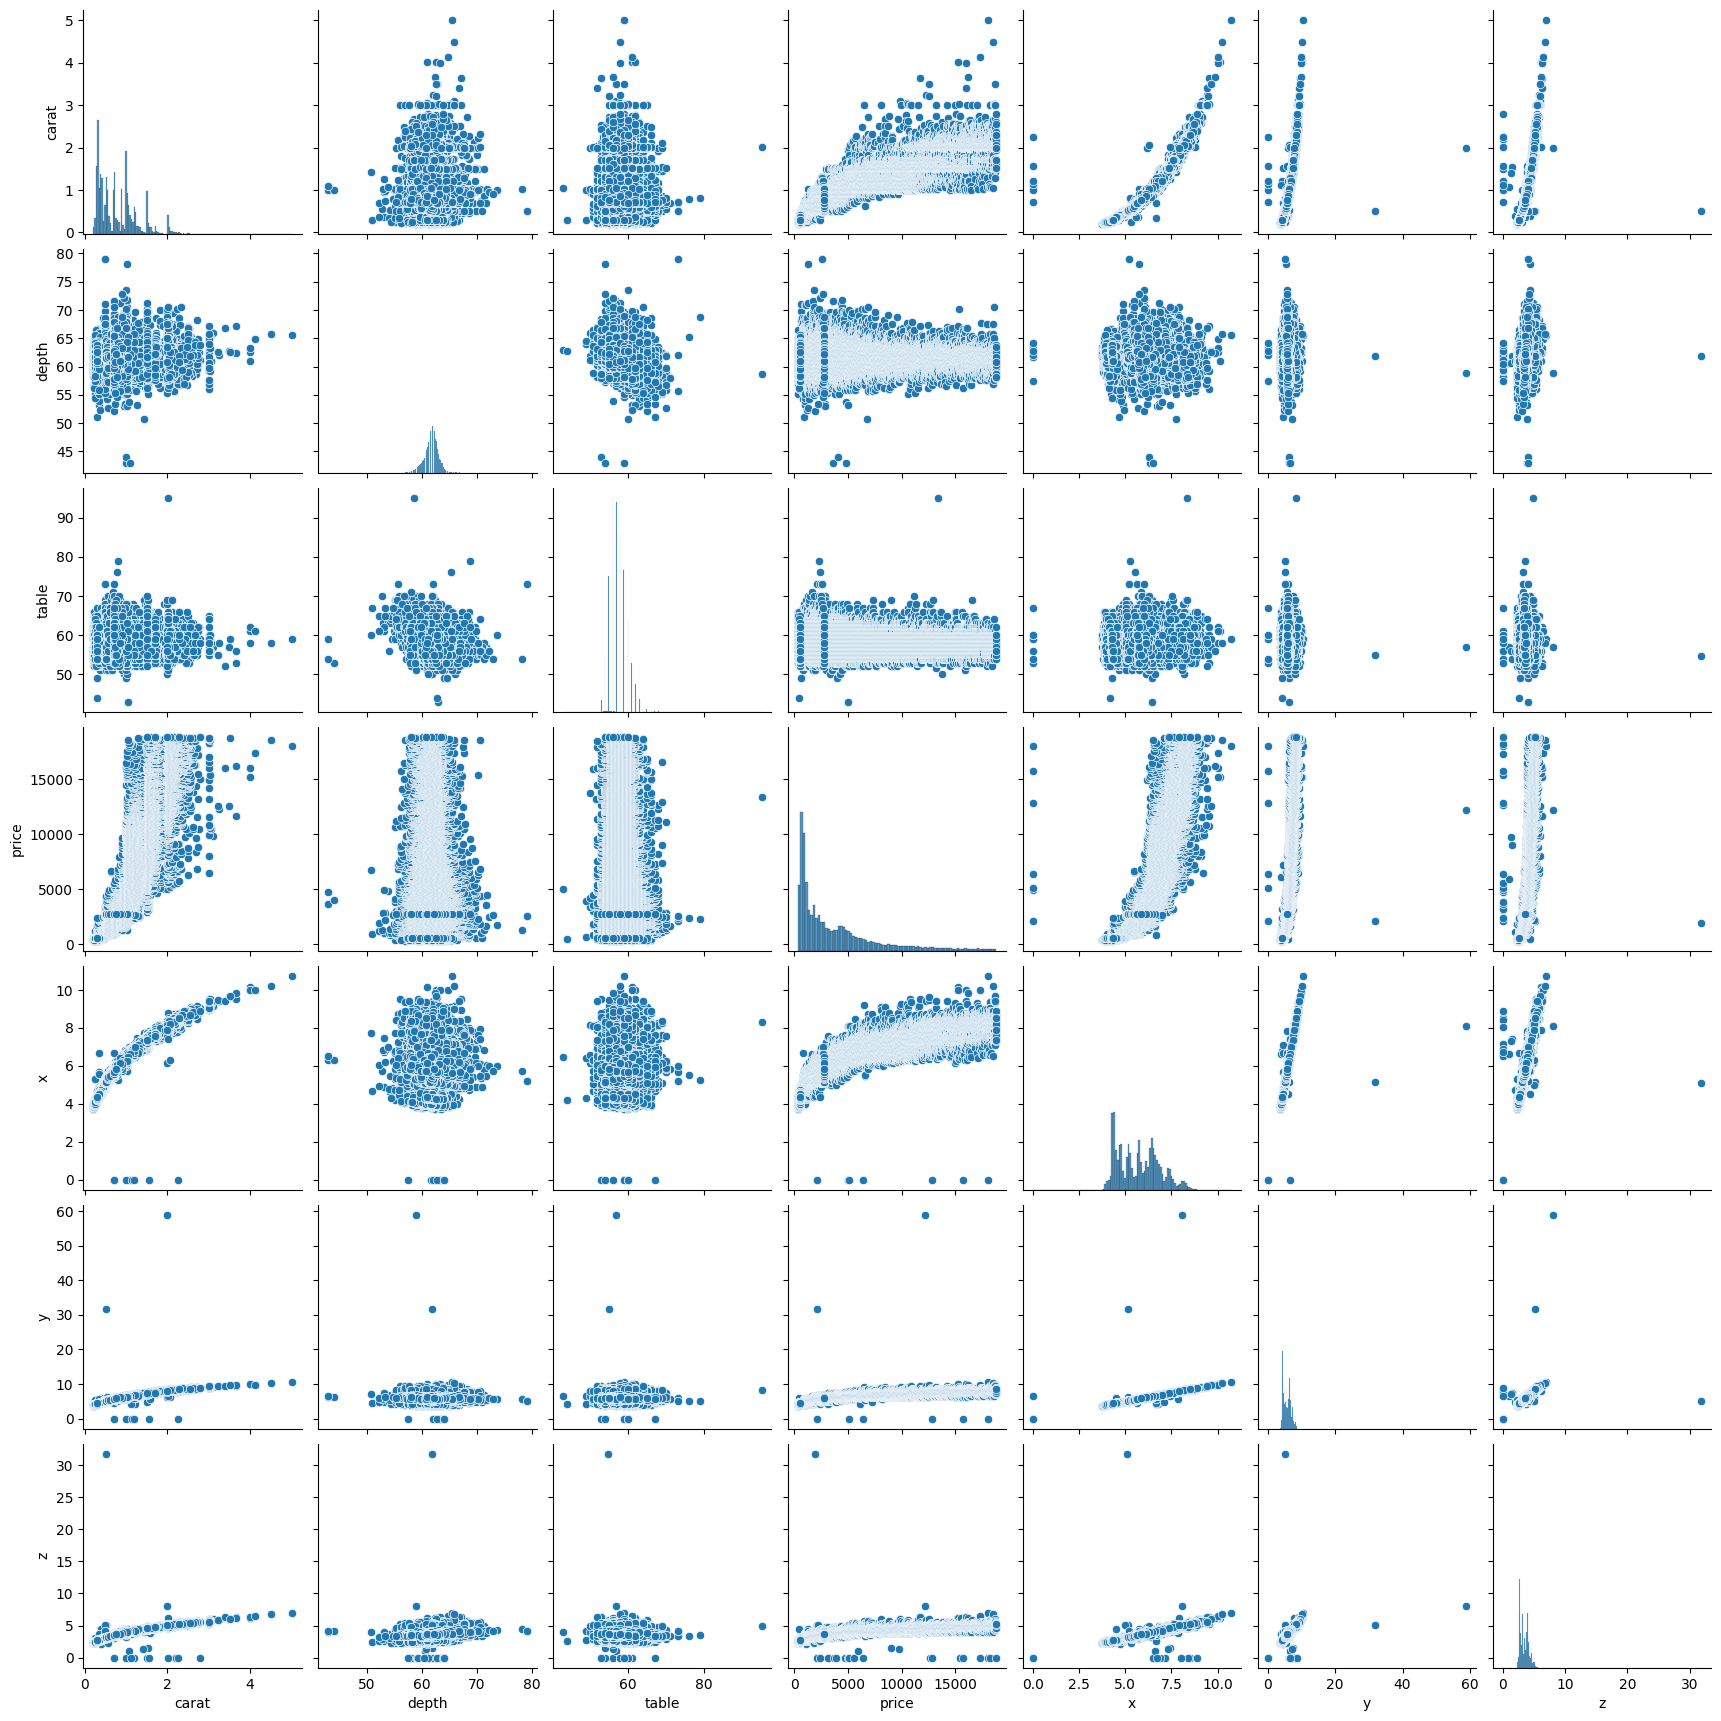

In [ ]:
 #Melihat plot dari masing-masing variabel sebelum preprocessing
 sns.pairplot(df_diamond)

Berdasarkan hasil heatmap di atas, kami memilih atribut yang akan digunakan adalah sebagai berikut:

*   Variabel Dependen (y) = Price
*   Variabel Independen (x) = Carat, x, y, dan z

Proses selanjutnya adalah, akan dikalikan 'x', 'y', dan 'z' sehingga pengukurannya adalah berdasarkan volume dan bukan panjang per sumbu. Namun, didapat bahwa ada beberapa nilai pada kolom x, y, dan z yang bernilai nol, sehingga perlu dilakukan penghapusan terlebih dahulu.



In [ ]:
#Melihat unit observasi dalam kolom x, y dan z yang bernilai nol
df_xyz_nol = df_diamond[(df_diamond['x'] == 0) | (df_diamond['y'] == 0) | (df_diamond['z'] == 0)]
print(df_xyz_nol)
print()
print('Banyak baris x y atau z yang bernilai nol adalah = ',len(df_xyz_nol))

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []

Banyak baris x y atau z yang bernilai nol adalah =  0


Karena unit observasi pada kolom xyz yang bernilai nol berjumlah 20 baris, maka kami memutuskan untuk menghapus baris tersebut

In [ ]:
#Mendefine df_diamond yang baru tanpa ada nilai nol di kolom x, y dan z
df_diamond = df_diamond[~((df_diamond['x']==0) | (df_diamond['y']==0) | (df_diamond['z']== 0))]
df_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Visualisasi untuk mendapatkan informasi tentang dataset**

Sebelum melakukan tahap preprocessing lebih lanjut, kami ingin melihat karakteristik variabel kategorik dari dataset terhadap variabel dependen y (price)

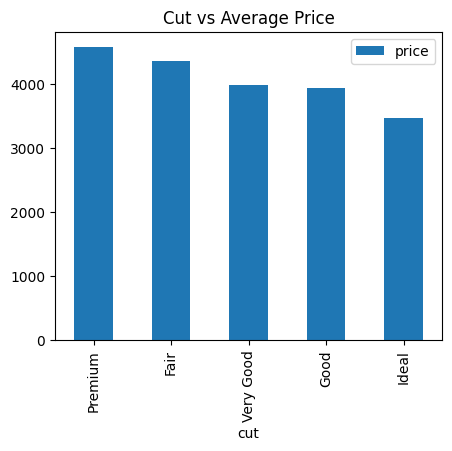

In [ ]:
dv1 = pd.DataFrame(df_diamond.groupby(['cut'])['price'].mean().sort_values(ascending = False))
dv1.plot.bar(figsize=(5,4))
plt.title('Cut vs Average Price')
plt.show()

#Insight:
#Harga rata-rata dari potongan berlian tipe premium adalah yang paling tinggi
# Harga rata-rata dari potongan berlian tipe ideal adalah yang paling rendah


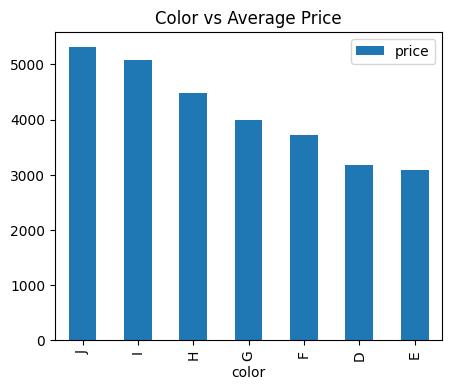

In [ ]:
dv2 = pd.DataFrame(df_diamond.groupby(['color'])['price'].mean().sort_values(ascending = False))
dv2.plot.bar(figsize=(5,4))
plt.title('Color vs Average Price')
plt.show()

#Insight:
# Harga rata-rata dari warna berlian tipe J adalah yang tertinggi
# Harga rata-rata dari warna berlian tipe E adalah yang paling rendah

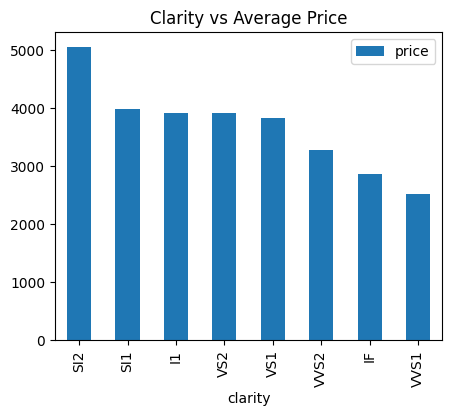

In [ ]:
dv3 = pd.DataFrame(df_diamond.groupby(['clarity'])['price'].mean().sort_values(ascending = False))
dv3.plot.bar(figsize=(5,4))
plt.title('Clarity vs Average Price')
plt.show()

# Harga rata-rata dari kejernihan berlian tipe SI2 adalah yang paling tinggi
# Harga rata-rata dari kejernihan berlian tipe VVS1 adalah yang paling rendah


In [ ]:
#Mengalikan kolom x y dan z menjadi volume diamond yang dinamakan kolom 'size'
df = df_diamond.loc[:, ['price','table','depth','carat','x','y','z']]
df['size'] = df['x']*df['y']*df['z']
df = df.drop(columns=['x','y','z'], axis=1)

#Mengambil 500 observasi secara random dari dataset untuk dijadikan model
df = df.sample(n=500, random_state=1)
df = df.reset_index(drop=True)
df

,price,table,depth,carat,size
0,492,57.0,61.3,0.28,46.232536
1,2596,62.0,67.7,1.29,198.391950
2,14295,57.8,60.6,1.52,248.970040
3,703,55.0,61.0,0.37,62.287890
4,893,55.0,61.4,0.33,55.764144
...,...,...,...,...,...
495,1599,54.0,61.4,0.51,84.566090
496,8644,62.0,62.0,1.55,251.325909
497,668,57.0,60.7,0.33,54.590400
498,2398,56.0,62.5,0.74,120.601075


**OUTLIER**

Selanjutnya akan dilihat outlier dari dataset diamond dan melakukan penanganan outlier tersebut

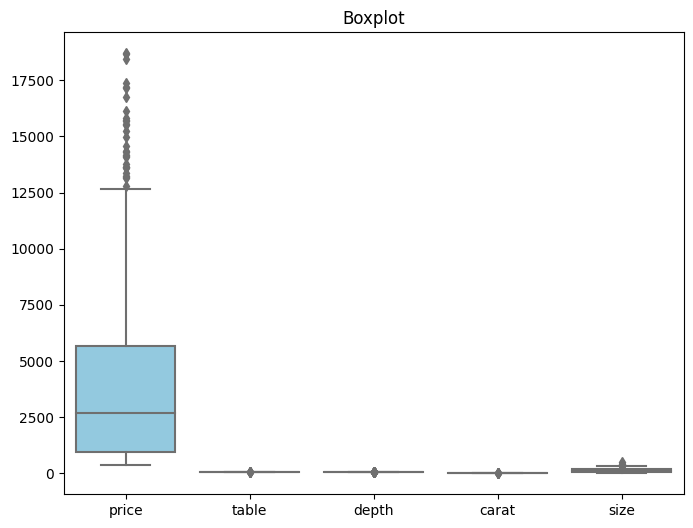

In [ ]:
# Membuat boxplot dari df
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, color='skyblue')  # Mengatur warna plot

plt.title("Boxplot")
plt.show()

In [ ]:
# detect outlier menggunakan quantil atas dan quantil bawah
Q1 = df.quantile(0.25) # Q1 adalah kuratil pertama df
Q3 = df.quantile(0.75) # Q3 adalah kuartil ketiga df
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Nilai di luar rentang Q1 - 1,5 * IQR hingga Q3 + 1,5 * IQR dianggap outlier
# Penggunaan tanda negasi (~) untuk ambil baris yang tidak mengandung nilai di luar batas outlier
# any(axis=1) untuk mengecek setiap baris pada dataset

# Menghapus baris yang memiliki nilai di luar batas-batas
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Menghapus outlier
df = df[~outliers]

In [ ]:
df

,price,table,depth,carat,size
0,492,57.0,61.3,0.28,46.232536
3,703,55.0,61.0,0.37,62.287890
4,893,55.0,61.4,0.33,55.764144
5,891,54.0,62.1,0.31,51.633630
6,4039,55.0,62.2,0.77,125.552700
...,...,...,...,...,...
494,5029,53.0,64.3,0.86,143.316936
495,1599,54.0,61.4,0.51,84.566090
497,668,57.0,60.7,0.33,54.590400
498,2398,56.0,62.5,0.74,120.601075


**MISSING VALUE**

Akan dilakukan pengecekan apakah ada missing value pada data yang digunakan.

In [ ]:
missing_value = df.isnull().sum()
print(missing_value)

price    0
table    0
depth    0
carat    0
size     0
dtype: int64


Tidak terdapat missing value


**STATISTIKA DESKRIPTIF**

In [ ]:
df.describe()

,price,table,depth,carat,size
count,433.000000,433.00000,433.000000,433.000000,433.000000
mean,3437.799076,57.27806,61.769053,0.737413,120.057431
std,3074.133328,1.94004,1.089263,0.400165,64.355068
min,386.000000,53.00000,58.800000,0.210000,34.030920
25%,877.000000,56.00000,61.100000,0.370000,60.534832
50%,2330.000000,57.00000,61.800000,0.700000,113.314950
75%,5184.000000,58.00000,62.500000,1.010000,165.020700
max,12674.000000,63.00000,64.600000,2.040000,329.923530


**MEMBAGI DATA MENJADI DUA DATASET**
Akan didefinisikan dua dataframe yang akan diproses, yakni
*  df1 = menggunakan variabel independen table, depth, carat, dan size
*  df2 = menggunakan variabel independen table, depth, dan carat

In [ ]:
df1 = df
df1.columns

Index(['price', 'table', 'depth', 'carat', 'size'], dtype='object')

In [ ]:
df2 = df1.drop(['size'], axis=1)
df2.columns

Index(['price', 'table', 'depth', 'carat'], dtype='object')

**KORELASI SETELAH PRE-PROCESSING**

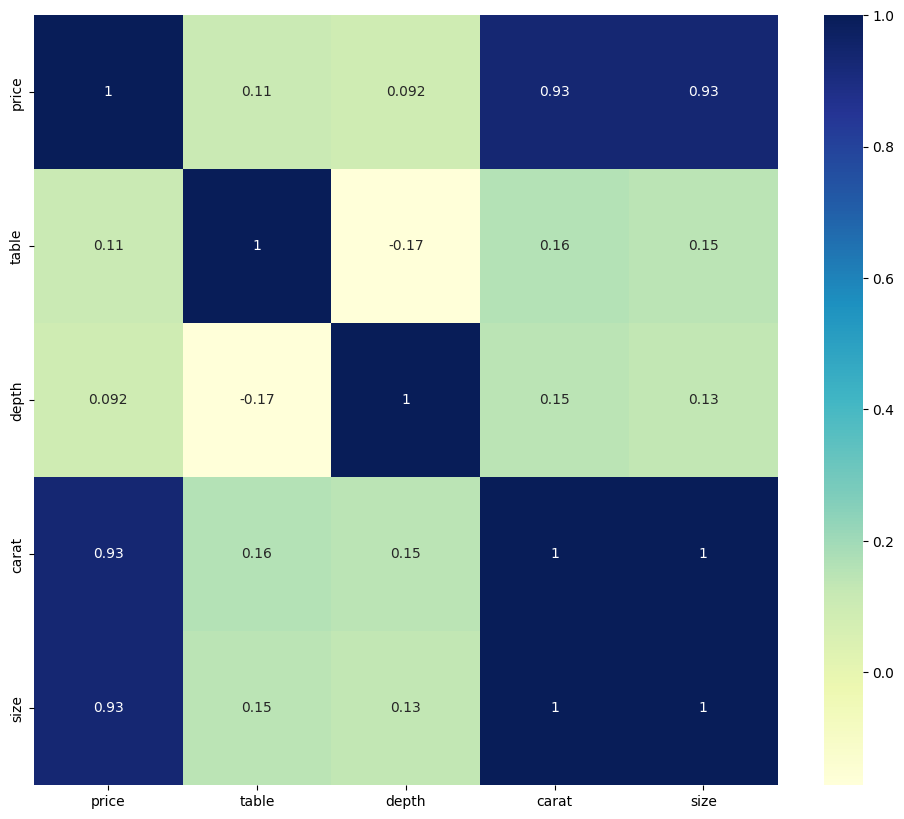

In [ ]:
# heatmap df1
plt.figure(figsize = (12, 10))
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")
plt.show()

Insights
*   Terlihat bahwa variabel respon berkorelasi linier positif yang tinggi dengan variabel independen 'size' dan 'carat'
*   Namun selain antar variabel dependen dan independen terdapat hubungan linier yang sangat kuat antara 'size' dengan 'carat' dimana keduanya merupakan variabel independen

Hal tersebut juga yang mendasari kami membuat 2 model dengan dan tanpa variabel 'size'



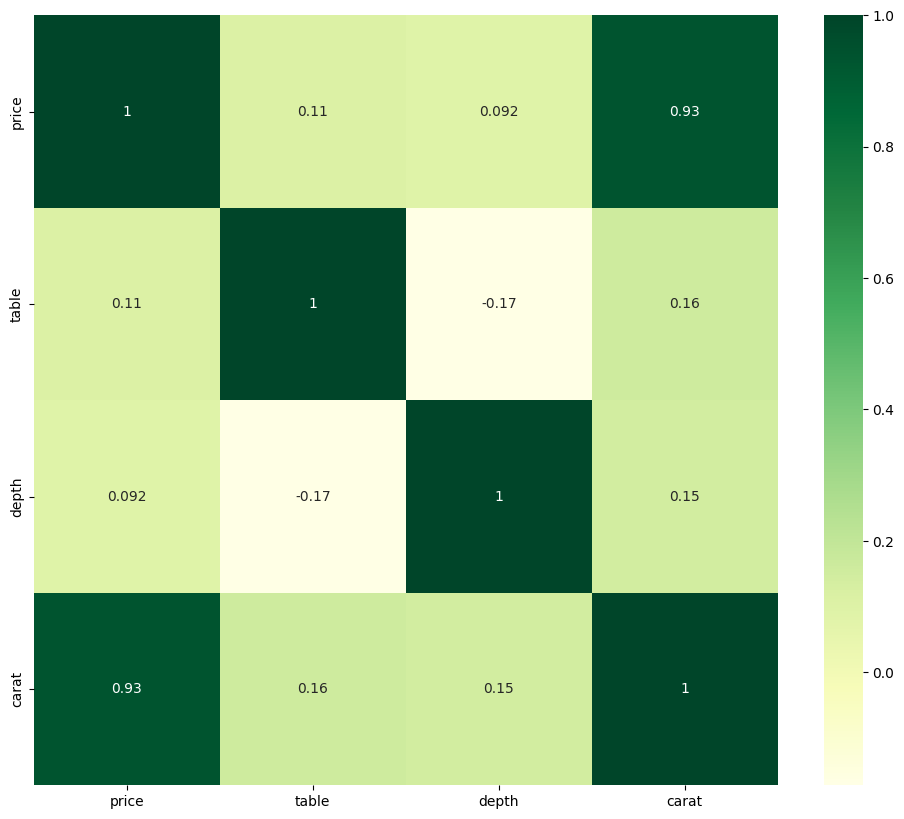

In [ ]:
# heatmap df2
plt.figure(figsize = (12, 10))
sns.heatmap(df2.corr(), annot = True, cmap="YlGn")
plt.show()

Insight

Setelah variabel 'size' dihapus terlihat yang memiliki hubungan linier positif yang kuat adalah 'price' dengan 'carat'. Hal ini membantu mengurangi multicollinearity pada model regresi linier

#<font color="BEE7FF">**OLS Result**</font>

##<font color="956BDF">**OLS Model 1**</font>

In [ ]:
dep_var1 = df1.drop(columns=['table','depth','carat','size'])
ind_var1 = df1.drop(columns=['price'])
ind_var1 = sm.add_constant(ind_var1)

ols1 = sm.OLS(dep_var1,ind_var1)
ols_fit1 = ols1.fit()

print(ols_fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     728.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.67e-189
Time:                        05:25:29   Log-Likelihood:                -3646.2
No. Observations:                 433   AIC:                             7302.
Df Residuals:                     428   BIC:                             7323.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.098e+04   4418.334      2.485      0.0

##<font color="956BDF">**OLS Model 2**</font>

In [ ]:
dep_var2 = df2.drop(columns=['table','depth','carat'])
ind_var2 = df2.drop(columns=['price'])
ind_var2 = sm.add_constant(ind_var2)

ols2 = sm.OLS(dep_var2,ind_var2)
ols_fit2 = ols2.fit()
print(ols_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     973.5
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          5.59e-191
Time:                        05:25:29   Log-Likelihood:                -3646.3
No. Observations:                 433   AIC:                             7301.
Df Residuals:                     429   BIC:                             7317.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.215e+04   3761.109      3.231      0.0

#<font color="BEE7FF">**Pengecekan Asumsi Model**</font>

Asumsi model dapat terpenuhi jika :
* E(ϵ) = 0
* Var(ϵ) = 𝜎^2 ,
* ϵ ~ *NIID* (0 , σ^2)

##<font color="956BDF">**Asumsi Model 1**</font>


###<font color="B8DE9A">Ekspektasi Error = 0</font>

In [ ]:
# nilai prediction model df1
ols_pred1 = ols_fit1.predict(ind_var1)

# menambahkan kolom redisual untuk df1
df1['residual']=dep_var1['price'] - ols_pred1

<ipython-input-24-39f22dde0b1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['residual']=dep_var1['price'] - ols_pred1


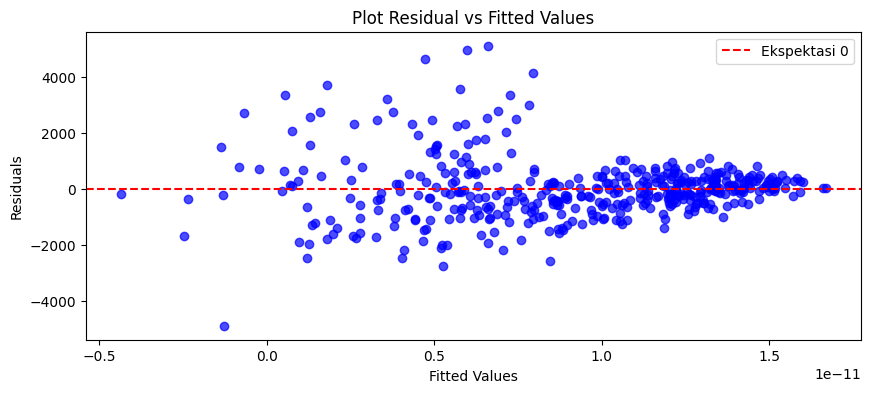

In [ ]:
Error1 = df1['residual']
modeldf1 = sm.OLS(Error1, ind_var1).fit()

# Mendapatkan nilai yang telah di-fit (fitted values) dari model regresi
fitted_values = modeldf1.fittedvalues

# Mengatur ukuran gambar
plt.figure(figsize=(10, 4))  # Ubah angka 8 dan 4 sesuai dengan ukuran yang Anda inginkan

# Menggambarkan plot residual vs fitted values
plt.scatter(fitted_values, modeldf1.resid, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Ekspektasi 0')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Plot Residual vs Fitted Values')
plt.legend()
plt.show()

###<font color="B8DE9A">Error~N(0, σ^2) = 0</font>

<Figure size 800x500 with 0 Axes>

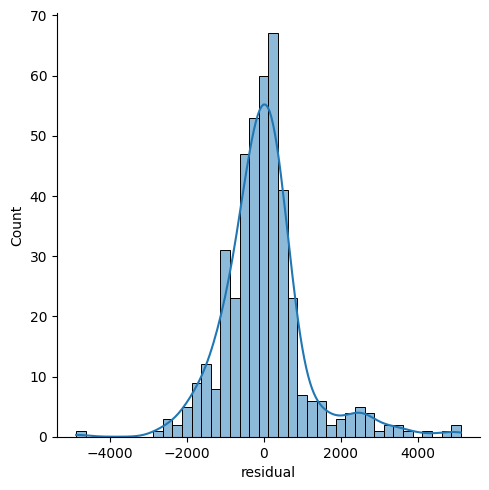

In [ ]:
# ploting residual untuk df1
plt.figure(figsize=(8,5))
sns.displot(df1['residual'] , bins=40 , kde=True)

<Figure size 800x500 with 0 Axes>

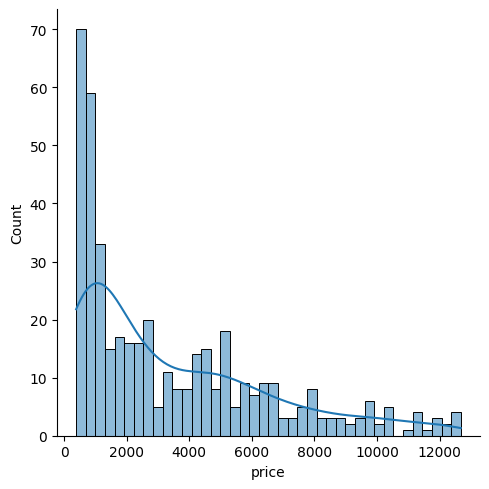

In [ ]:
# ploting residual untuk df1
plt.figure(figsize=(8,5))
sns.displot(df2['price'] , bins=40 , kde=True)

##<font color="956BDF">**Asumsi Model 2**</font>

###<font color="B8DE9A">Ekspektasi Error = 0</font>

In [ ]:
# nilai prediction model df2
ols_pred2 = ols_fit2.predict(ind_var2)

# menambahkan kolom redisual untuk df2
df2['residual']=dep_var2['price'] - ols_pred2

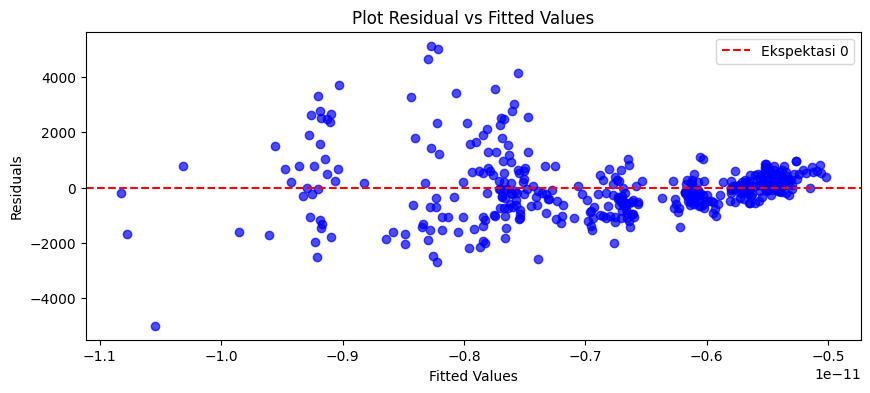

In [ ]:
Error2 = df2['residual']
modeldf2 = sm.OLS(Error2, ind_var2).fit()

# Mendapatkan nilai yang telah di-fit (fitted values) dari model regresi
fitted_values = modeldf2.fittedvalues

# Mengatur ukuran gambar
plt.figure(figsize=(10, 4))  # Ubah angka 8 dan 4 sesuai dengan ukuran yang Anda inginkan

# Menggambarkan plot residual vs fitted values
plt.scatter(fitted_values, modeldf2.resid, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Ekspektasi 0')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Plot Residual vs Fitted Values')
plt.legend()
plt.show()

###<font color="B8DE9A">Error~N(0, σ^2) = 0</font>

<Figure size 800x500 with 0 Axes>

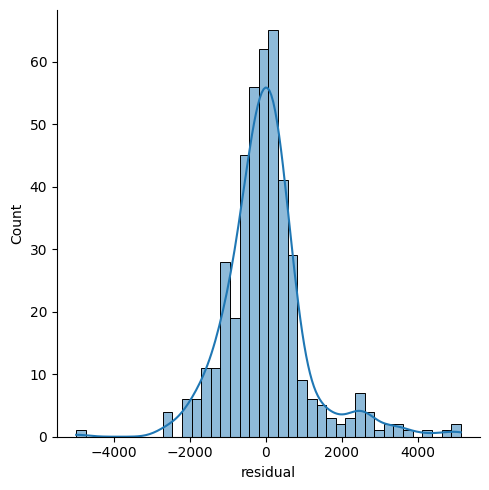

In [ ]:
# ploting residual untuk df2
plt.figure(figsize=(8,5))
sns.displot(df2['residual'] , bins=40 , kde=True)

#<font color="BEE7FF">**Visualisasi Model Linier**</font>

##<font color="956BDF">**Visualisasi Model 1**</font>

In [ ]:
df1.corr()

,price,table,depth,carat,size,residual
price,1.000000,1.114468e-01,9.216754e-02,9.314934e-01,9.324129e-01,3.577811e-01
table,0.111447,1.000000e+00,-1.721575e-01,1.577937e-01,1.451046e-01,-1.863793e-15
depth,0.092168,-1.721575e-01,1.000000e+00,1.477110e-01,1.340999e-01,-3.000574e-16
carat,0.931493,1.577937e-01,1.477110e-01,1.000000e+00,9.992166e-01,-1.914258e-15
size,0.932413,1.451046e-01,1.340999e-01,9.992166e-01,1.000000e+00,-1.841070e-15
residual,0.357781,-1.863793e-15,-3.000574e-16,-1.914258e-15,-1.841070e-15,1.000000e+00


Text(0.5, 1.0, 'df1 plot for price vs carat')

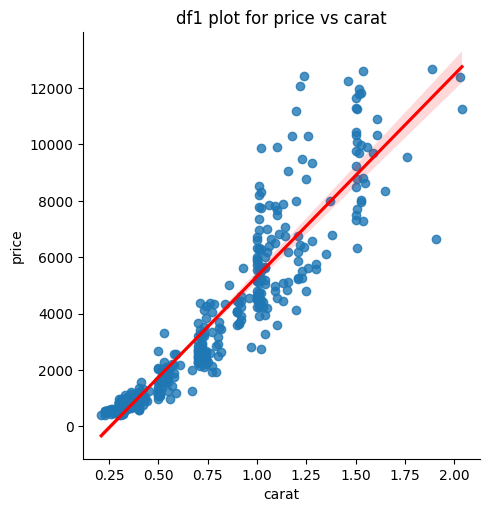

In [ ]:
sns.lmplot(x='carat', y='price', data=df1, line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title('df1 plot for price vs carat')

Text(0.5, 1.0, 'df1 plot for price vs size')

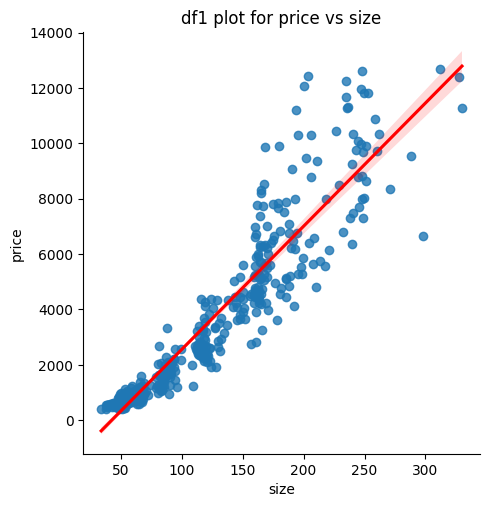

In [ ]:
sns.lmplot(x='size', y='price', data=df1, line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title('df1 plot for price vs size')

Text(0.5, 1.0, 'df1 plot for price vs depth')

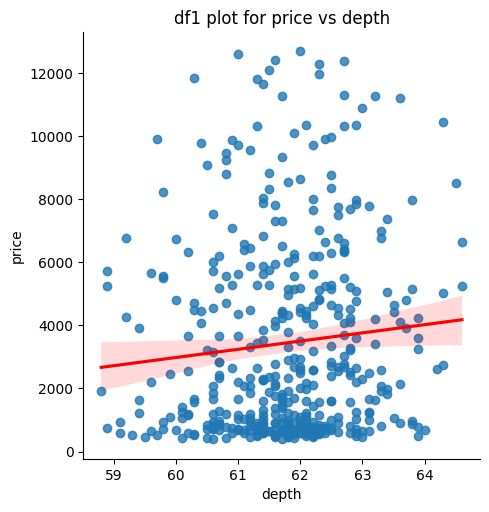

In [ ]:
sns.lmplot(x='depth', y='price', data=df1, line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title('df1 plot for price vs depth')

Text(0.5, 1.0, 'df1 plot for price vs table')

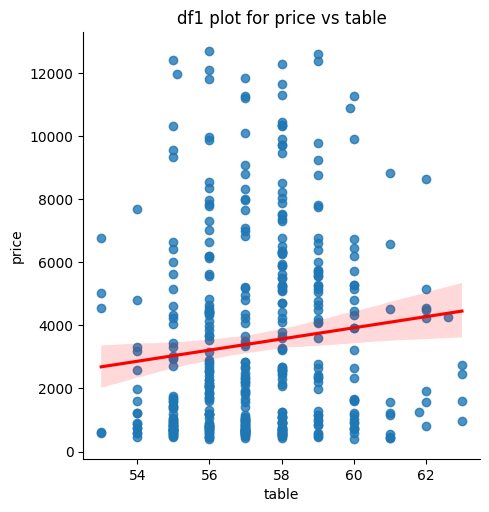

In [ ]:
sns.lmplot(x='table', y='price', data=df1, line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title('df1 plot for price vs table')

Text(0.5, 1.02, 'Pairplot df1')

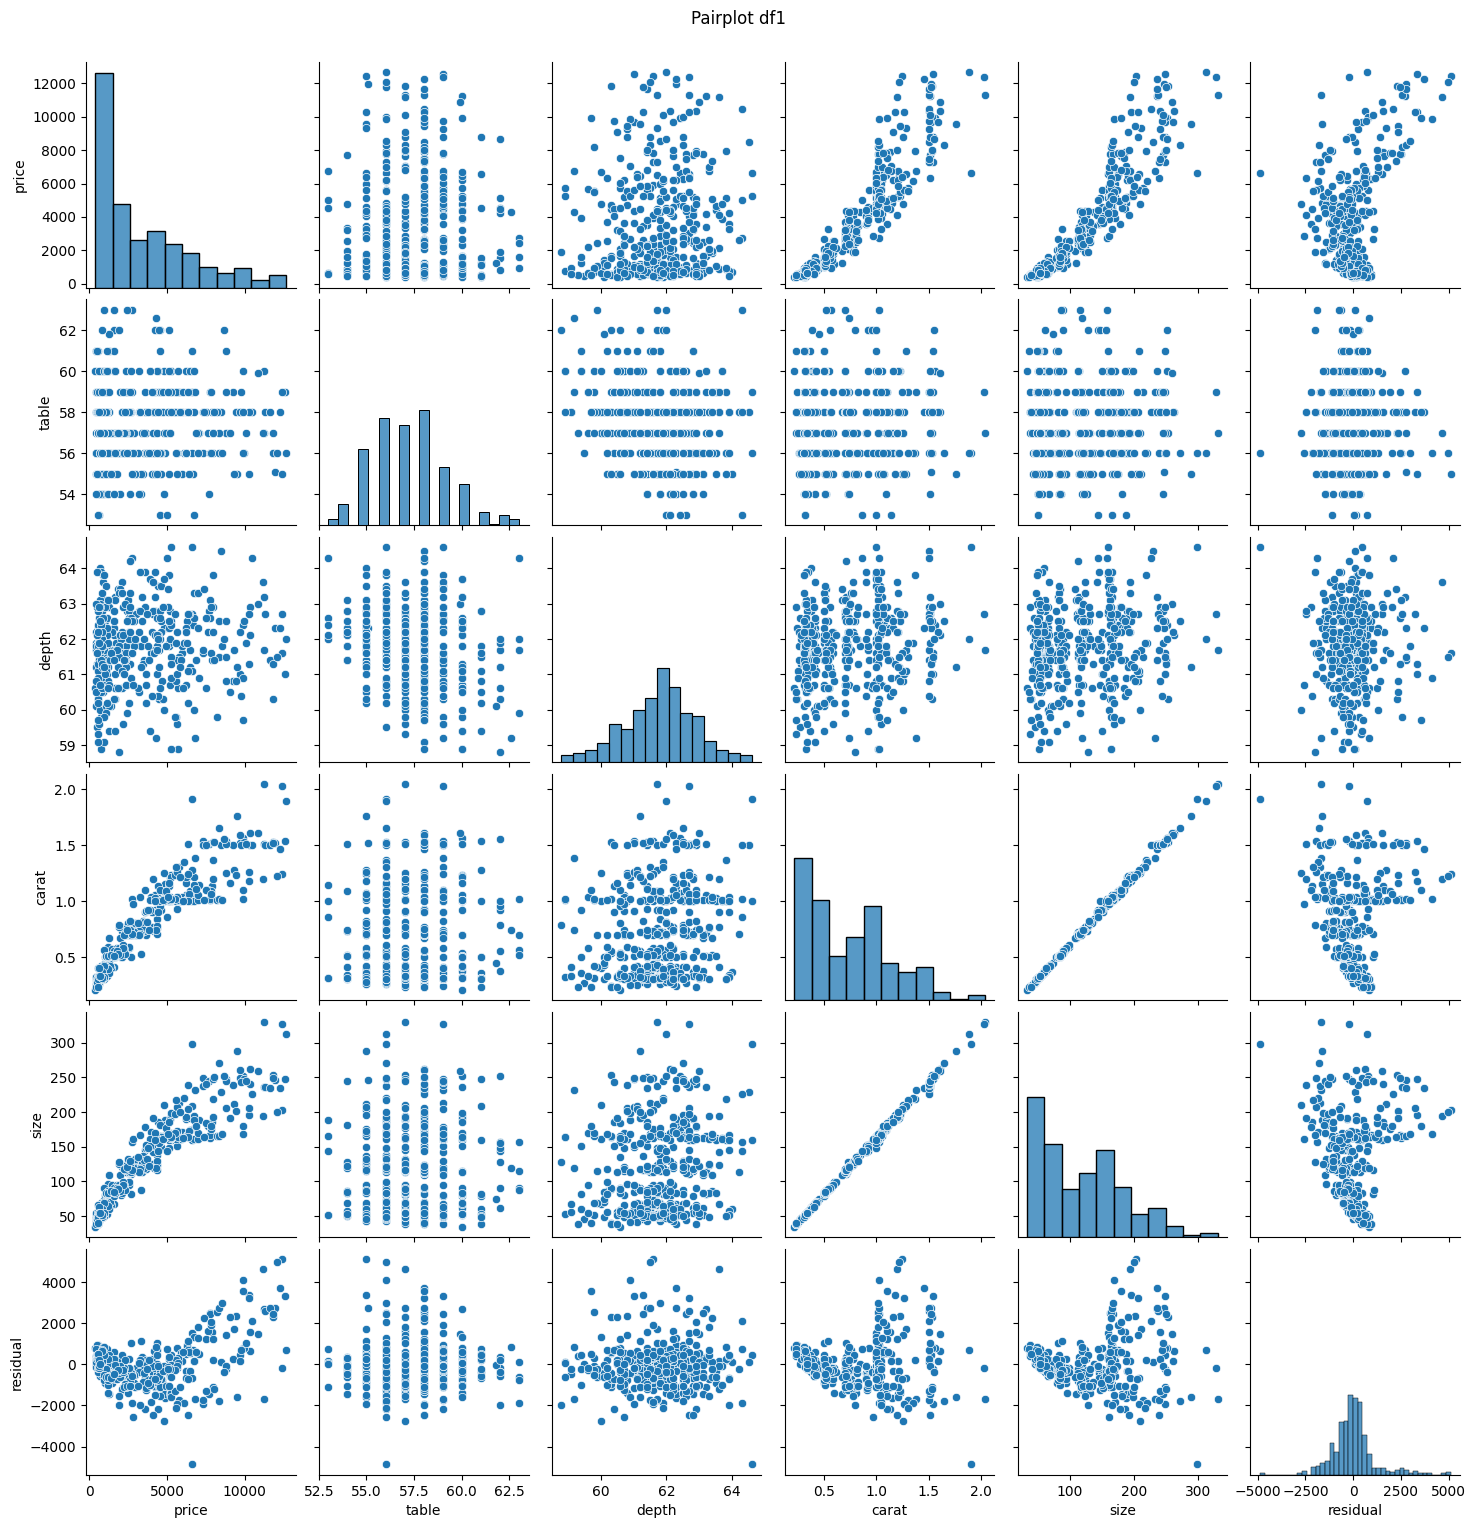

In [ ]:
plot1 = sns.pairplot(df1)
plot1.fig.suptitle("Pairplot df1", y=1.02)

##<font color="956BDF">**Visualisasi Model 2**</font>

Text(0.5, 1.0, 'df2 plot for price vs carat')

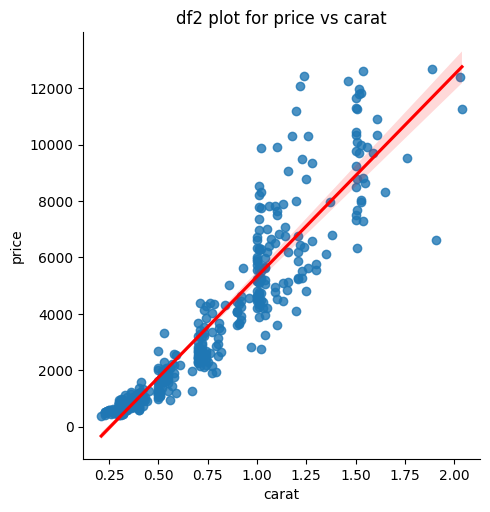

In [ ]:
sns.lmplot(x='carat', y='price', data=df2, line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title('df2 plot for price vs carat')

Text(0.5, 1.0, 'df2 plot for price vs table')

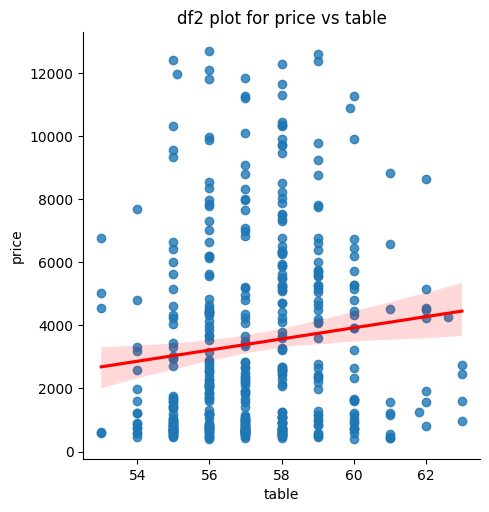

In [ ]:
sns.lmplot(x='table', y='price', data=df2, line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title('df2 plot for price vs table')

Text(0.5, 1.0, 'df2 plot for price vs depth')

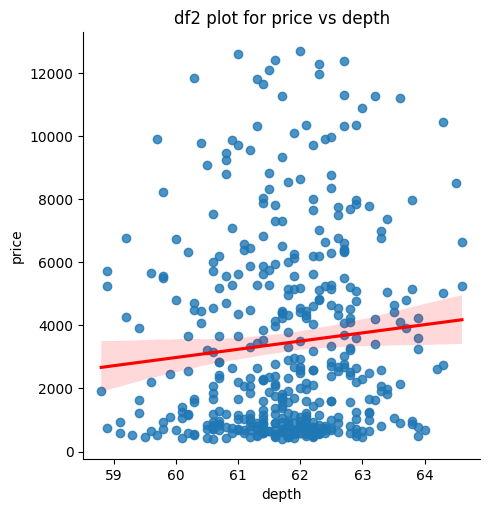

In [ ]:
sns.lmplot(x='depth', y='price', data=df2, line_kws={'color': 'red'})
ax = plt.gca()
ax.set_title('df2 plot for price vs depth')

Text(0.5, 1.02, 'Pairplot df2')

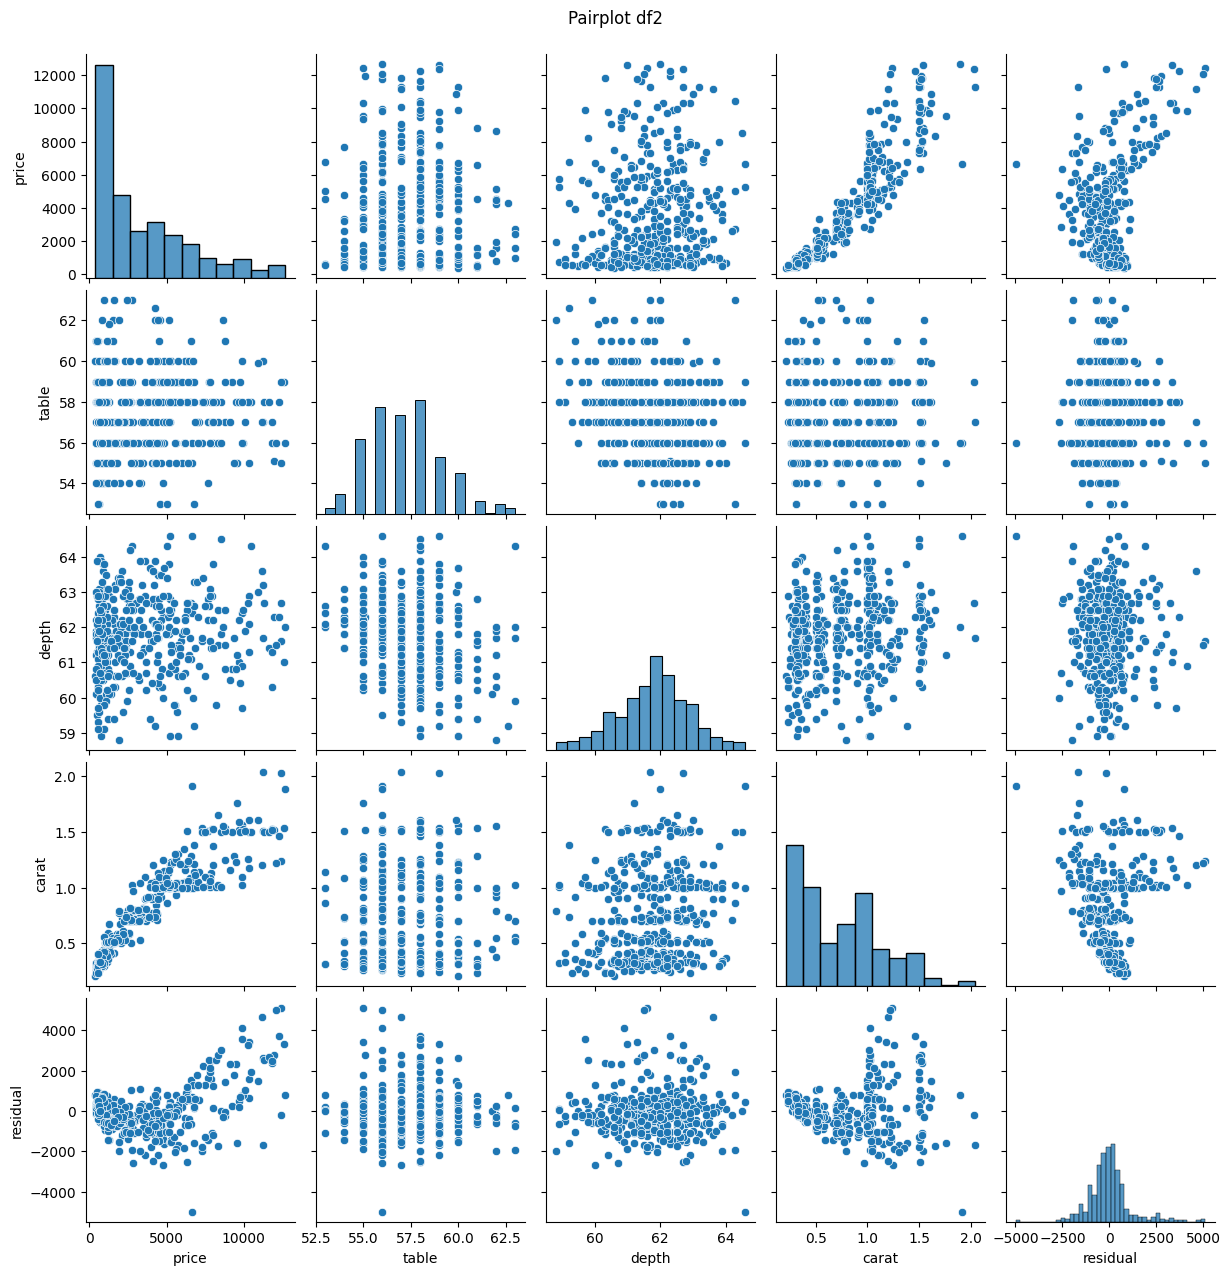

In [ ]:
plot2 = sns.pairplot(df2)
plot2.fig.suptitle("Pairplot df2", y=1.02)

#<font color="BEE7FF">**Kesimpulan**</font>

Berdasarkan hasil tersebut, kami menyimpulkan bahwa penjual berlian dapat menentukan harga jual berlian dengan memperhatikan besarnya ukuran dan karat dari berlian tersebut, yaitu semakin besar ukuran dan karat dari berlian, maka semakin mahal pula harga dari berlian tersebut. Begitu pula untuk pembeli berlian yang dapat menyesuaikan budget yang dimiliki dalam membeli berlian dengan memperhatikan ukuran dan karat dari berlian.


In [ ]:
df_temp= df2.copy()
df_temp.drop(columns='residual', inplace=True)
df_temp

NameError: ignored

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(np.log(df_temp), line='45')
plt.show()

NameError: ignored

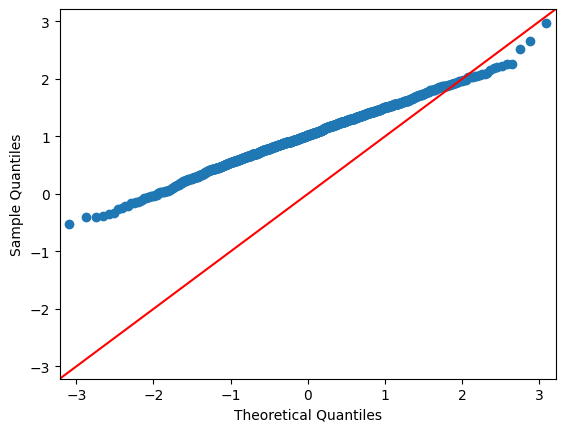

In [ ]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
df_temp = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(np.log(df_temp), line='45')

plt.show()

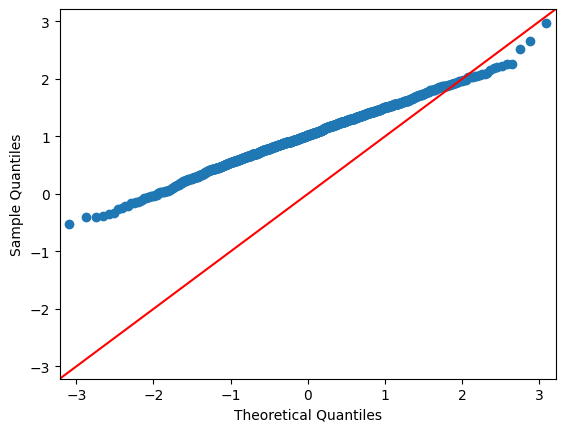

In [ ]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
df_temp = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(np.log(df_temp), line='45')

plt.show()

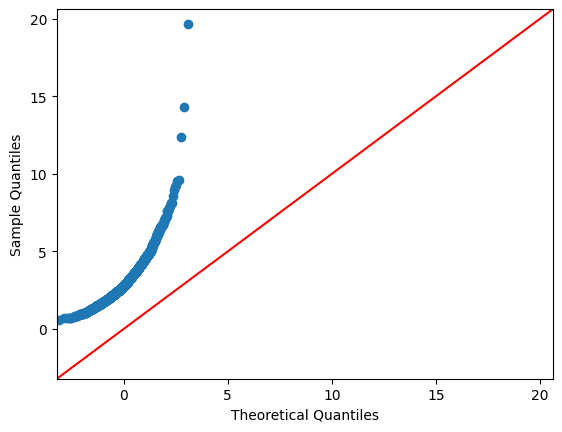

In [ ]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
df_temp = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df_temp, line='45')

plt.show()